# Classification model using Random Forest

### 1. Import libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

### 2. Upload Clinic data

In [17]:
path ="../../../../Data_preprocessing/RNA_post_autoencoder/encoded_data_binary_200.csv"
data = pd.read_csv(path)
data.reset_index
data.round(4)
data=data.iloc[:,1:202 ] 
data.head()

,Target,0,1,2,3,4,5,6,7,8,...,190,191,192,193,194,195,196,197,198,199
0,1,0.832239,1.233726,1.140988,2.165680,-1.597017,-0.743907,-0.071826,0.116781,-0.635038,...,0.077455,0.066486,2.200836,2.124988,-0.882250,0.367745,1.330217,0.660291,-0.899856,1.536773
1,1,-0.137469,-0.010969,0.843637,0.966030,0.409513,-0.847683,-1.006673,0.749325,-1.147702,...,-0.583738,-1.836914,1.908090,1.263731,-1.759173,-0.579072,1.043836,0.452179,0.771279,1.454416
2,1,-0.405876,0.109203,1.359791,1.225490,-0.138266,-1.679678,0.182724,-0.188638,-1.128553,...,0.342459,-0.801281,2.540216,0.933610,-1.590028,0.056035,1.889005,1.706726,0.912262,1.206671
3,0,-0.376180,0.196114,0.779141,1.123773,0.374653,-0.947631,-0.892223,0.621932,-0.999321,...,-0.272015,-2.344969,2.089854,1.595235,-1.722826,-0.317329,1.074202,0.198977,0.917910,1.435312
4,1,-1.964517,1.128601,-0.194799,-1.433777,-0.143446,-1.161713,-2.380596,0.026122,-1.105232,...,0.160001,-1.498763,2.403551,1.303866,-1.757287,0.949241,0.272723,2.771020,1.826682,1.859360


In [18]:
Y = data.Target # Target column

X = data.iloc[:,1:202] # I selected all the columns by removing the Unnamed column (row id) and the Target column.

print(X)
print('Numero de pacientes: ',len(Y))

            0         1         2         3         4         5         6  \
0    0.832239  1.233726  1.140988  2.165680 -1.597017 -0.743907 -0.071826   
1   -0.137469 -0.010969  0.843637  0.966030  0.409513 -0.847683 -1.006673   
2   -0.405876  0.109203  1.359791  1.225490 -0.138266 -1.679678  0.182724   
3   -0.376180  0.196114  0.779141  1.123773  0.374653 -0.947631 -0.892223   
4   -1.964517  1.128601 -0.194799 -1.433777 -0.143446 -1.161713 -2.380596   
..        ...       ...       ...       ...       ...       ...       ...   
176 -0.442013  0.276400  0.702629  0.145038  0.253912 -1.027387 -0.954011   
177  0.122423  0.435671  1.195094  1.099650 -0.651924 -1.125421 -0.957930   
178 -0.338142  0.528099  0.594873  0.742365 -0.105854 -1.069006 -0.974031   
179  0.151963  0.431527  0.093600  0.226152 -0.943175 -1.319361 -1.243683   
180 -0.074435  0.889761  1.095850  0.759461 -0.669753 -0.916490 -0.742355   

            7         8         9  ...       190       191       192  \
0  

### 3. Train-Test dataset split

In [19]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125, stratify=Y)

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Select the parameters of the model and fit it

In [20]:
param_grid = {'min_samples_leaf': [1, 3],
              'min_samples_split': [2, 3, 4, 5],
              'random_state':[125],
              'n_estimators': [10, 15],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'max_depth':[None, 2, 5, 10,50]
              }

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(
        estimator  = RandomForestClassifier(),
        param_grid = param_grid,
        cv=5
       )

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10, 50],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 15], 'random_state': [125]})

In [21]:
print("Mejor estimación de parámetros según GridSearchCV:")
print(clf.best_estimator_)
model = clf.best_estimator_

Mejor estimación de parámetros según GridSearchCV:
RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=5,
                       n_estimators=15, random_state=125)


In [22]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))


Best result of the cross validation of the model with the best paramters:0.6187192118226601


### 5. Prediction

In [23]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0
yTrain=yTrain.to_numpy()

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [24]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0
yTest=yTest.to_numpy()

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


### 6. Results

In [25]:
print('Final accuracy on the training dataset:' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset:0.9652777777777778
Final accuracy on the testing dataset: 0.5675675675675675


In [26]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[66  2]
 [ 3 73]]
Input data:  [1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1]
Prediction:        [1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1]


In [27]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        68
           1       0.97      0.96      0.97        76

    accuracy                           0.97       144
   macro avg       0.96      0.97      0.97       144
weighted avg       0.97      0.97      0.97       144



In [28]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[ 6 11]
 [ 5 15]]
Input data:  [0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0]
Prediction:        [0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0]


In [29]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.55      0.35      0.43        17
           1       0.58      0.75      0.65        20

    accuracy                           0.57        37
   macro avg       0.56      0.55      0.54        37
weighted avg       0.56      0.57      0.55        37



Features with relevance over 0:  104
Features with relevance over 0.05:  1


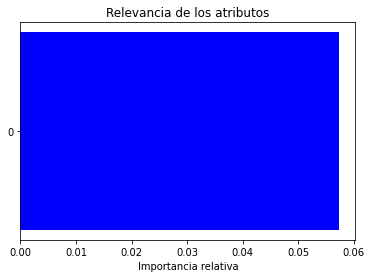

0 = 0.0
1 = 0.0197539339449422
2 = 0.0164592135126347
3 = 0.013857126868887073
4 = 0.004878682968522797
5 = 0.0
6 = 0.002775970385969977
7 = 0.006278386422264703
8 = 0.007699014421227391
9 = 0.0
10 = 0.0
11 = 0.0029907387573202956
12 = 0.006211699996422296
13 = 0.0
14 = 0.0
15 = 0.005712904344584233
16 = 0.011538264353843834
17 = 0.006119341069769497
18 = 0.0
19 = 0.003775224942666266
20 = 0.004470762696736658
21 = 0.0
22 = 0.014494109473532775
23 = 0.010980504388129687
24 = 0.0
25 = 0.012318033535853154
26 = 0.0
27 = 0.007578899791468885
28 = 0.009383768223360829
29 = 0.0
30 = 0.0
31 = 0.0245916946772084
32 = 0.0
33 = 0.0
34 = 0.007645190744664201
35 = 0.0
36 = 0.0
37 = 0.01321042293867591
38 = 0.0
39 = 0.0
40 = 0.0
41 = 0.010600168990675446
42 = 0.006410395231425949
43 = 0.008557094234912957
44 = 0.0
45 = 0.007253848885054228
46 = 0.0
47 = 0.0
48 = 0.007634301467953051
49 = 0.007880440496852699
50 = 0.0
51 = 0.004509929438118313
52 = 0.0
53 = 0.0
54 = 0.007977314672386951
55 = 0.0
56

In [30]:
# Through the created model we can see which attributes are the most significant to make a decision.
# The most relevant attributes will be the ones placed at the top of the tree.
features = list(X)
importances = model.feature_importances_

elems_over_0 = np.fromiter((element for element in importances if element > 0), dtype = importances.dtype)
print('Features with relevance over 0: ', len(elems_over_0))

newArray = np.fromiter((element for element in importances if element > 0.05), dtype = importances.dtype)
importances=newArray
indices = np.argsort(importances)
print('Features with relevance over 0.05: ', len(newArray))

plt.title('Relevancia de los atributos')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia relativa')
plt.show()

for name, importance in zip(X, model.feature_importances_):
    print(name, "=", importance)

# Attributes whose relevance is 0, will not be necessary to make the prediction of the target.